# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


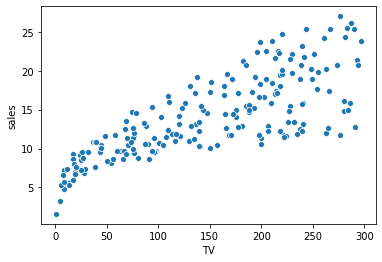

In [6]:
plt.figure()
sns.scatterplot(data=df,x="TV", y="sales")
plt.show()

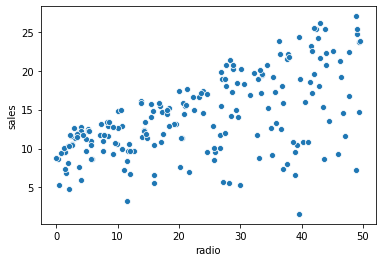

In [7]:
plt.figure()
sns.scatterplot(data=df,x="radio", y="sales")
plt.show()

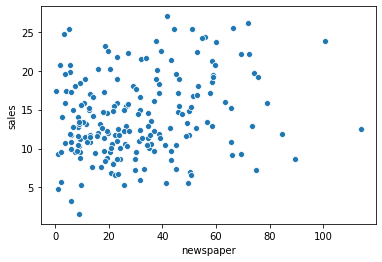

In [8]:
plt.figure()
sns.scatterplot(data=df,x="newspaper", y="sales")
plt.show()

In [9]:
cor = df.corr()

In [10]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


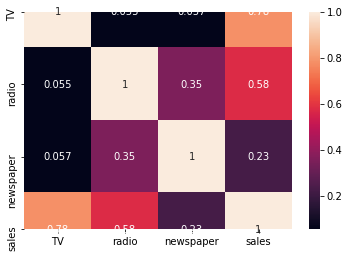

In [11]:
plt.figure()
sns.heatmap(cor,annot=True)
plt.show()

## Modeling with TV

In [12]:
X = df[["TV"]]
y = df["sales"]

### split data for train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

### Training

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr.intercept_

6.923519536059554

In [17]:
lr.coef_

array([0.04812204])

### Testing

In [18]:
y_pred = lr.predict(X_test)

In [19]:
mean_squared_error(y_test,y_pred)

10.571057434656955

In [20]:
r2_score(y_test,y_pred)

0.575061860494331

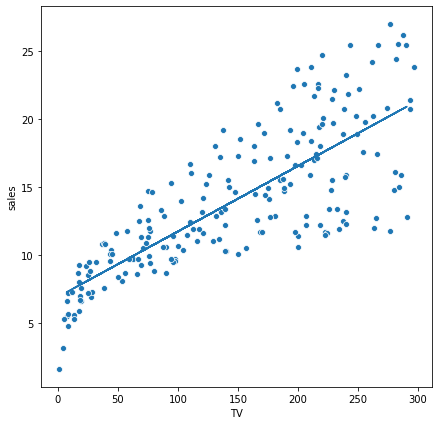

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="TV", y="sales")
plt.plot(X_test["TV"],y_pred)
plt.show()

## Modeling with Radio

In [22]:
X = df[["radio"]]
y = df["sales"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.intercept_

9.440936561425886

In [26]:
lr.coef_

array([0.1874808])

In [27]:
y_pred = lr.predict(X_test)

In [28]:
mean_squared_error(y_test,y_pred)

14.604130559272193

In [29]:
r2_score(y_test,y_pred)

0.41293932917162335

## Modeling with Newspaper

In [30]:
X = df[["newspaper"]]
y = df["sales"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.intercept_

11.82966888487788

In [34]:
lr.coef_

array([0.06532045])

In [35]:
y_pred = lr.predict(X_test)

In [36]:
mean_squared_error(y_test,y_pred)

25.49745237441493

In [37]:
r2_score(y_test,y_pred)

-0.024953278429509007

## Multiple linear regression

In [38]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr.intercept_

2.9372157346906125

In [42]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [43]:
y_pred = lr.predict(X_test)

In [44]:
mean_squared_error(y_test,y_pred)

1.9289249074665717

In [45]:
r2_score(y_test,y_pred)

0.9224605706201435

## Assumptions of Linear Regression

In [46]:
X = df[["TV","radio"]]
y = df["sales"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr.intercept_

2.9647671191401574

In [50]:
lr.coef_

array([0.04697554, 0.17765046])

In [51]:
y_pred = lr.predict(X_test)

In [52]:
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [53]:
r2_score(y_test,y_pred)

0.9230321850256801

In [54]:
residuals = y_test - y_pred

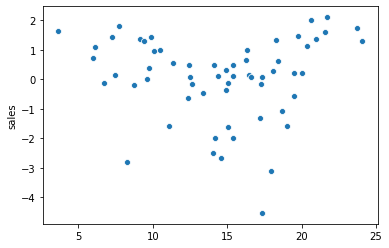

In [55]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

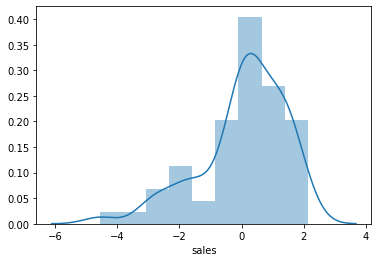

In [56]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Polynomial regression

In [57]:
# Linear 
def poly_1(x):
    
    y = 4*x + 5
    return y    


# Quadratic
def poly_2(x):
    
    y = 6*(x**2) + 4*x + 5
    return y

# Cubic
def poly_3(x):
    
    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y


# Plot
def plot(x,y):
    
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [58]:
x = np.arange(-100,100)

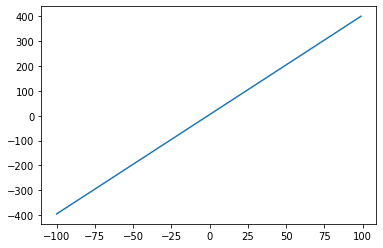

In [59]:
# plot linear relation

y = poly_1(x)
plot(x,y)

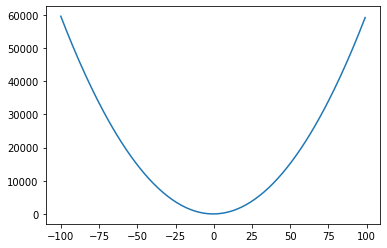

In [60]:
# plot quadratic relation

y = poly_2(x)
plot(x,y)

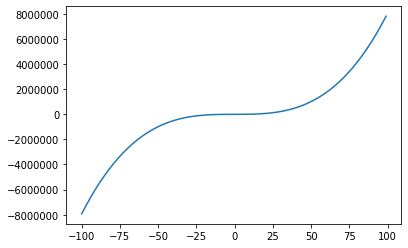

In [61]:
# plot cubic relation

y = poly_3(x)
plot(x,y)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
X = df[["TV","radio"]]
y = df["sales"]

In [64]:
pf = PolynomialFeatures(2)

In [65]:
X_poly = pf.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.3)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lr.predict(X_test)

In [69]:
mean_squared_error(y_test,y_pred)

0.17238345081006942

In [70]:
r2_score(y_test,y_pred)

0.9930704848288269

In [71]:
residuals = y_test - y_pred

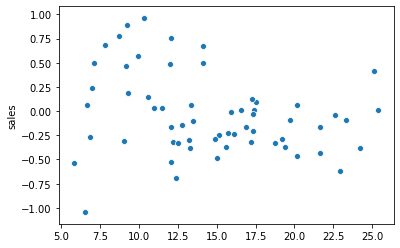

In [72]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

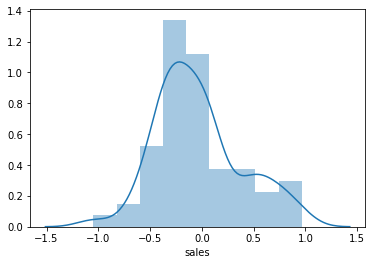

In [73]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Gradient descent

In [81]:
def gradient_descent(x,y):
    
    
    n = len(x)
    learning_rate = 0.08
    intercept = slope = 0
    iterations = 50
    
    for i in range(iterations):
        
        y_pred = x*slope + intercept
        
        mse = mean_squared_error(y_pred,y)
        
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)

        slope = slope - (learning_rate * md)
        intercept = intercept - (learning_rate * bd)
        
        print("slope: ",slope,"\nintercept: ",intercept,"\nmse: ",mse,"\niteration: ",i,"\n-------------------")

In [90]:
X = np.array([1,2,3,4])
y = np.array([10,12,20,25])

In [91]:
gradient_descent(X,y)

slope:  7.76 
intercept:  2.68 
mse:  317.25 
iteration:  0 
-------------------
slope:  5.136 
intercept:  1.8272000000000002 
mse:  37.5484 
iteration:  1 
-------------------
slope:  6.001919999999999 
intercept:  2.160448 
mse:  5.946675839999994 
iteration:  2 
-------------------
slope:  5.6954368 
intercept:  2.0940083200000004 
mse:  2.363295509503997 
iteration:  3 
-------------------
slope:  5.783309312 
intercept:  2.1607922688000003 
mse:  1.944685321356901 
iteration:  4 
-------------------
slope:  5.73902123008 
intercept:  2.181741780992 
mse:  1.8841286943434368 
iteration:  5 
-------------------
slope:  5.739499041587201 
intercept:  2.21705460400128 
mse:  1.8646353110795062 
iteration:  6 
-------------------
slope:  5.725278350082048 
intercept:  2.246526250726195 
mse:  1.8503780860340768 
iteration:  7 
-------------------
slope:  5.716333829693113 
intercept:  2.276970710577185 
mse:  1.8372827631707351 
iteration:  8 
-------------------
slope:  5.70594494983